# Time to try importing and plotting...

[  9.41736030e-05   1.36979790e-04   1.85493460e-04 ...,   2.81693220e-02
   2.84175980e-02   2.84746730e-02]
[ 0.0368974  0.0373882  0.0359156 ...,  0.0359156  0.0354247  0.0354247]
[-1.06612  1.15584 -1.03996 ...,  4.02734 -4.64516 -1.57724]


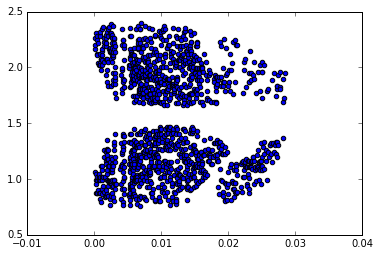

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools

with open('tubes_prob01_2cycle_fine.dat') as f_in:
        t,phi,th,r,dr = np.genfromtxt(itertools.islice(f_in, 0, None, 2),unpack=True,usecols=[0,1,2,3,4])
f_in.close()

with open('tubes_prob01_2cycle_fine.dat') as f_in2:
        flux = np.genfromtxt(itertools.islice(f_in2, 1, None, 2),unpack=True,usecols=[0])
f_in2.close()


print(t)
print(dr)
print(flux)

plt.scatter(t,th)
plt.show()



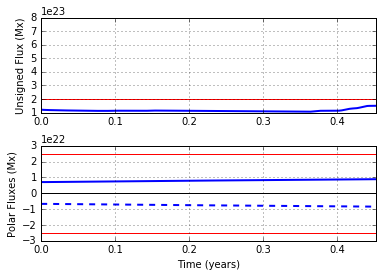

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools


with open('diagnostics.dat') as f_in3:
        t,un,us,pn,ps = np.genfromtxt(f_in3,unpack=True,usecols=[0,1,2,3,4])
f_in3.close()

bCorrect = -250
ETA0 = 1.6e11
L0 = 6.96e10

t = t*L0**2/ETA0/86400.0/365.25
tmax = np.max(t)


un = un*np.abs(bCorrect)
us = us*np.abs(bCorrect)
pn = pn*bCorrect
ps = ps*bCorrect

f = un+us


plt.subplot(211)
plt.subplots_adjust(hspace=0.35)

plt.plot(t,f,'b',linewidth=2)
plt.plot([0,tmax],[2e23, 2e23],'r')
plt.plot([min(t),tmax], [8e23, 8e23],'r');
plt.ylabel('Unsigned Flux (Mx)')
plt.xlim(0,tmax)
plt.grid()


plt.subplot(212)
plt.plot(t,pn,linewidth=2)
plt.plot(t,ps,'b--',linewidth=2)
plt.xlabel('Time (years)')
plt.ylabel('Polar Fluxes (Mx)')
plt.xlim(0,tmax)
plt.plot([min(t),tmax], [0,0],'k');
plt.plot([min(t),tmax], [2.5e22, 2.5e22],'r');
plt.plot([min(t),tmax], [-2.5e22, -2.5e22],'r');
plt.grid()


plt.show()

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools


f = open('bfly_prob01_2cycle_fine.dat', 'rb')
recl = np.fromfile(f, dtype='int32', count=1)
f.seek(4)
field = np.fromfile(f, dtype='float32')

print('Record length=',recl)
print(field)








#bCorrect = -250
#bx = bx*bCorrect
#bz = bz*bCorrect

cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","w","r"])

#plt.subplot(211)


#plt.contourf(t,lat,bx,150,cmap=cm1,vmin=-1000,vmax=1000)
#plt.ylabel('Latitude (deg)');
#plt.colorbar()


#plt.subplot(212)


#plt.contourf(t,lat,bz,150,cmap=cm1,vmin=-6,vmax=6)
#plt.colorbar()
#plt.xlabel('Time (years)');
#plt.ylabel('Latitude (deg)');

#plt.show()


('Record length=', array([4], dtype=int32))
[  3.54528511e-43   5.60519386e-45   2.83622809e-42 ...,   1.14769352e+35
  -8.93471718e-01   2.83622809e-42]


# I need to convert this to Python

fid=fopen(strcat(fpath,'bfly.dat'), 'rb'); % Open the file.

hr=fread(fid, 1, 'int32'); % Record start tag
ny=fread(fid, 1, 'int32');
he=fread(fid, 2, 'int32'); % Record end and start tags
th=fread(fid, ny, 'float64');
hr=fread(fid, 1, 'int32'); % Record end tag
t=[]; bx=[]; bz=[];
while ~feof(fid)
    hr=fread(fid, 1, 'int32'); % Record start tag
    t=[t fread(fid, 1, 'float64')];
    hr=fread(fid, 2, 'int32'); % Record end and start tags
    bx=[bx fread(fid, ny, 'float64')];
    hr=fread(fid, 2, 'int32'); % Record end and start tags
    bz=[bz fread(fid, ny, 'float64')];
    hr=fread(fid, 1, 'int32'); % Record end tag
end
fclose(fid); % Close file.
t = t*L0^2/ETA0/86400.0/365.25;
lat = 90. - th*180/pi;
bx=bx*bCorrect; bz=bz*bCorrect;

fig=figure();
colormap(cmap);
subaxis(3,1,1, 'MarginTop', 0.06, 'MarginLeft', 0.08, 'MarginRight', 0.04, 'Spacing',0.03);

contourf(t,lat,bx,150,'EdgeColor','None');
set(gca,'CLim',[-0.1e4 0.1e4])
set(gca,'xTickLabel',[])
if (nargin > 1)
    xlim([0 tmax]);
end
ylabel('Latitude (deg)');
colorbar();
hold on;

if exist(strcat(fpath,'tubes.dat'),'file')
% scatter plot eruptions:  (use gscatter to separate + and -)
    scatter(tt(bxVal > 0.),latt(bxVal > 0.),6,'m');
    scatter(tt(bxVal < 0.),latt(bxVal < 0.),6,brown);
end
    
subaxis(3,1,2);
contourf(t,lat,bz,150,'EdgeColor','None');
set(gca,'CLim',[-6 6])
if (nargin > 1)
    xlim([0 tmax]);
end
xlabel('Time (years)');
ylabel('Latitude (deg)');
colorbar();
